<a href="https://colab.research.google.com/github/rahulin05/NLP_Deep_Learning/blob/master/NLP%2BDeep_Learning/TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text Classification

* Text Classification is an automated process of classification of text into predefined categories. We can classify Emails into spam or non-spam, news articles into different categories like Politics, Technology, Sports, etc.

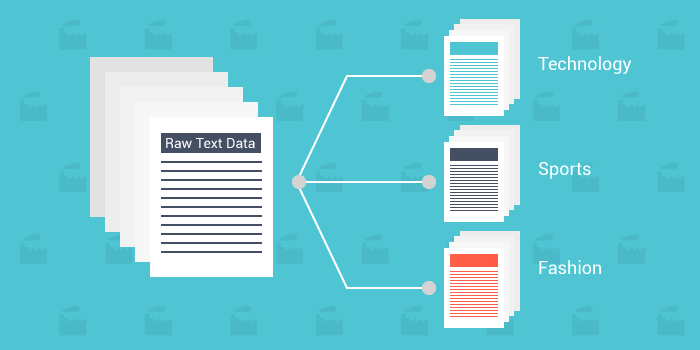

In [46]:
from IPython.display import Image
Image("img/text_img.png")

In [47]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.chdir('/content/gdrive/My Drive/NLTK/Text_Classification')

#### Loading required libraries

In [0]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset

In [0]:
Corpus = pd.read_csv("SMSSpamCollection.csv",delimiter="\t",encoding='utf-8',header=None)

#### Check the number of rows and columns

In [63]:
Corpus.shape

(5572, 2)

#### Display top 5 rows

In [64]:
Corpus.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
Corpus.columns = ['type','text'] # Changing Column names

In [66]:
Corpus.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
Corpus['type'].value_counts()

ham     4825
spam     747
Name: type, dtype: int64

#### Checking for Null values

In [68]:
Corpus.isnull().sum()

type    0
text    0
dtype: int64

#### Observation: There are no Null values in the dataset

### Text Pre-processing

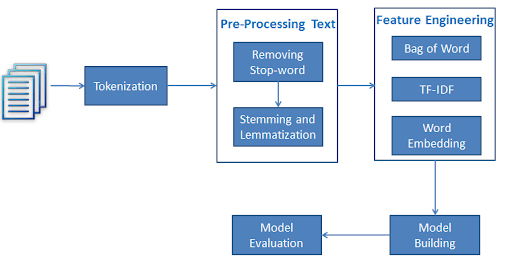

In [69]:
Image("img/NLTK3.png",width=700)

In [0]:
# Step - a : Remove blank rows if any
# Corpus['text'].dropna(inplace=True) 

# Step - b : Change all the text to lower case. This is required as python interprets 'data' and 'DATA' differently
Corpus['text'] = [entry.lower() for entry in Corpus['text']]

# Step - c : Tokenization : In this step, each entry in the corpus will be broken into set of words
Corpus['text'] = [word_tokenize(entry) for entry in Corpus['text']]

# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmatization.

# WordNet is the lexical database i.e. dictionary for the English language, specifically designed for natural language processing.
# The WordNet is a part of Python's Natural Language Toolkit. It is a large word database of English Nouns, Adjectives, Adverbs and Verbs.

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to 'Noun'

tag_map = defaultdict(lambda : wn.NOUN)

tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

# Initializing WordNetLemmatizer()
word_Lemmatized = WordNetLemmatizer()
    
for index, entry in enumerate(Corpus['text']):
    
    # Declaring an Empty List to store the words that follow the rules for this step
    Final_words = []
       
    # pos_tag function below will provide the 'tag' i.e. if the word is Noun(N) or Verb(V) or something else.
    
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
            
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)
    

# nltk.download('tagsets')

#### Useful link to understand POS tagging
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [71]:
nltk.help.upenn_tagset("JJ$")
nltk.help.upenn_tagset("NN$")
nltk.help.upenn_tagset("RB")
nltk.help.upenn_tagset("VB")

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


#### Display top 10 rows after Text Pre-processing

In [72]:
Corpus.head(10)

,type,text,text_final
0,ham,"[go, until, jurong, point, ,, crazy.., availab...","['go', 'jurong', 'point', 'available', 'bugis'..."
1,ham,"[ok, lar, ..., joking, wif, u, oni, ...]","['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f...","['free', 'entry', 'wkly', 'comp', 'win', 'fa',..."
3,ham,"[u, dun, say, so, early, hor, ..., u, c, alrea...","['u', 'dun', 'say', 'early', 'hor', 'u', 'c', ..."
4,ham,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","['nah', 'think', 'go', 'usf', 'live', 'around'..."
5,spam,"[freemsg, hey, there, darling, it, 's, been, 3...","['freemsg', 'hey', 'darling', 'week', 'word', ..."
6,ham,"[even, my, brother, is, not, like, to, speak, ...","['even', 'brother', 'like', 'speak', 'treat', ..."
7,ham,"[as, per, your, request, 'melle, melle, (, oru...","['per', 'request', 'melle', 'oru', 'minnaminun..."
8,spam,"[winner, !, !, as, a, valued, network, custome...","['winner', 'value', 'network', 'customer', 'se..."
9,spam,"[had, your, mobile, 11, months, or, more, ?, u...","['mobile', 'month', 'u', 'r', 'entitle', 'upda..."


In [73]:
Corpus.dtypes

type          object
text          object
text_final    object
dtype: object

In [0]:
# Convert the 'type' column to appropriate datatype
Corpus['type']=Corpus['type'].astype("category")

In [75]:
Corpus.dtypes

type          category
text            object
text_final      object
dtype: object

#### Perform the train test split on the data and then build the model

In [0]:
train_X, test_X, train_y, test_y = train_test_split(Corpus['text_final'],Corpus['type'],test_size=0.3,random_state=123)


In [77]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(3900,)
(1672,)
(3900,)
(1672,)


In [78]:
print(train_X[0:2])
print(train_y[0:2])
print("\n")
print(test_X[0:2])
print(test_y[0:2])

2156                             ['year', 'many', 'mile']
3695    ['ok', 'im', 'sure', 'time', 'finish', 'tomorr...
Name: text_final, dtype: object
2156    ham
3695    ham
Name: type, dtype: category
Categories (2, object): [ham, spam]


3237    ['aight', 'text', 'back', 'mu', 'swing', 'need...
843     ['prashanthettan', 'mother', 'pass', 'away', '...
Name: text_final, dtype: object
3237    ham
843     ham
Name: type, dtype: category
Categories (2, object): [ham, spam]


### Calculate TF-TDF
####  Term Frequency: This summarizes how often a given word appears within a document
#### Inverse Document Frequency: This down scales words that appear a lot across documents

In [0]:
# Extending stop words list
stop_words = stopwords.words('english')
stop_words.extend(['aa','aah','aaniye','abj','ag'])

Tfidf_vect = TfidfVectorizer(stop_words=stop_words,max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
train_X_Tfidf = Tfidf_vect.transform(train_X)
test_X_Tfidf = Tfidf_vect.transform(test_X)

In [80]:
print(train_X_Tfidf.shape)

(3900, 5000)


In [81]:
print(train_X_Tfidf[0])

  (0, 4940)	0.4630730723328721
  (0, 2575)	0.7401105474523719
  (0, 2510)	0.48764711342316475


In [82]:
# Coverting to dense matrix and putting in a dataframe to view the Tfidf matrix
Dense_mat = train_X_Tfidf.todense()
Tfidf_Mat = pd.DataFrame(Dense_mat, columns=Tfidf_vect.get_feature_names())
Tfidf_Mat.head()

,aaooooright,abbey,abdomen,abeg,abel,aberdeen,abi,ability,abiola,able,abnormally,aboutas,abroad,absence,absolutely,abstract,abt,abta,aburo,abuse,abuser,ac,academic,acc,accent,accenture,accept,access,accessible,accidant,accident,accidentally,accommodation,accommodationvouchers,accomodate,accomodations,accordin,accordingly,account,accumulation,...,ym,ymca,yo,yoga,yogasana,yor,yorge,youdoing,youi,young,youphone,youre,yourinclusive,yourjob,youuuuu,youwanna,yoville,yowifes,yoyyooo,yr,yrs,yummmm,yummy,yun,yunny,yuo,yuou,yup,yupz,zac,zaher,zealand,zebra,zed,zero,zhong,zindgi,zoe,zogtorius,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.745157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Use the ML Algorithms to Predict the outcome

#### Implementing Naive Bayes

In [83]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train = Naive.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test = Naive.predict(test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score on Train set -> ", accuracy_score(train_y, pred_train)*100)
print("Naive Bayes Accuracy Score on Validation set -> ", accuracy_score(test_y, pred_test)*100)


rec = recall_score(test_y, pred_test, pos_label='spam')

prec = precision_score(test_y, pred_test, pos_label='spam')

print("Recall Score on Validation set:", rec)

print("Precision Score on Validation set:", prec)

Naive Bayes Accuracy Score on Train set ->  97.17948717948718
Naive Bayes Accuracy Score on Validation set ->  96.5311004784689
Recall Score on Validation set: 0.7565217391304347
Precision Score on Validation set: 0.9886363636363636


#### Implementing SVM

In [84]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel='linear')
SVM.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train1 = SVM.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test1 = SVM.predict(test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score on Train set -> ", accuracy_score(train_y, pred_train1)*100)
print("SVM Accuracy Score on Validation set -> ",accuracy_score(test_y, pred_test1)*100)

rec1 = recall_score(test_y, pred_test1, pos_label='spam')

prec1 = precision_score(test_y, pred_test1, pos_label='spam')

print("Recall Score on Validation set:", rec1)

print("Precision Score on Validation set:", prec1)

SVM Accuracy Score on Train set ->  99.12820512820512
SVM Accuracy Score on Validation set ->  97.9066985645933
Recall Score on Validation set: 0.8695652173913043
Precision Score on Validation set: 0.975609756097561


In [0]:
### Observation: 
## Recall is the performance metric in this case. 
## Based on the Recall score, SVM performed better than Naive Bayes